# Part A 

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
QLD_fuel_prices = pd.read_csv('QLD_fuel_prices.csv', parse_dates = ['TransactionDateutc'])
QLD_fuel_prices

/tmp/ipykernel_203/604006394.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc
0,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Diesel,1899,2024-01-11 05:28:00
1,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,PULP 98 RON,2099,2024-01-11 05:28:00
2,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Unleaded,1899,2024-01-11 05:28:00
3,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,1940,2024-01-18 21:41:00
4,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,2010,2024-01-30 21:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...
129168,61478222,Caltex Coopers Plains,Caltex,47 Lensworth St,Coopers Plains,QLD,4108,-27.572060,153.035099,Unleaded,1835,2024-03-24 02:09:00
129169,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,Diesel,1797,2024-03-19 05:36:00
129170,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,e10,1759,2024-03-19 05:36:00
129171,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,PULP 98 RON,1993,2024-03-19 05:36:00


In [2]:
#Part A: 2a Filtering missing data (There isnt any ?)
QLD_fuel_prices_filtered = QLD_fuel_prices.isna()
QLD_fuel_prices_filtered
#Because there isnt any missing data i chose not to filter any

,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
129168,False,False,False,False,False,False,False,False,False,False,False,False
129169,False,False,False,False,False,False,False,False,False,False,False,False
129170,False,False,False,False,False,False,False,False,False,False,False,False
129171,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
#Define the range
start_date = pd.Timestamp('2024-01-01')
end_date = pd.Timestamp('2024-03-31')

#Within the range
out_of_range_end = QLD_fuel_prices['TransactionDateutc'] > end_date
out_of_range_start = QLD_fuel_prices['TransactionDateutc'] < start_date

#Checking to see how many is ouside the range that was just define
Range_false = (QLD_fuel_prices[out_of_range_end|out_of_range_start])['TransactionDateutc'].count()
Range_false

2725

In [4]:
#Filtering the data
Jan_march_prices = QLD_fuel_prices[~out_of_range_end & ~out_of_range_start]
Jan_march_prices

,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc
0,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Diesel,1899,2024-01-11 05:28:00
1,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,PULP 98 RON,2099,2024-01-11 05:28:00
2,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Unleaded,1899,2024-01-11 05:28:00
3,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,1940,2024-01-18 21:41:00
4,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,2010,2024-01-30 21:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...
129168,61478222,Caltex Coopers Plains,Caltex,47 Lensworth St,Coopers Plains,QLD,4108,-27.572060,153.035099,Unleaded,1835,2024-03-24 02:09:00
129169,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,Diesel,1797,2024-03-19 05:36:00
129170,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,e10,1759,2024-03-19 05:36:00
129171,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,PULP 98 RON,1993,2024-03-19 05:36:00


In [5]:
#Conversion to dollars per litre
Jan_march_prices.Price = Jan_march_prices.loc[:,'Price']/1000
Jan_march_prices

/tmp/ipykernel_203/2035372339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jan_march_prices.Price = Jan_march_prices.loc[:,'Price']/1000


,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc
0,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Diesel,1.899,2024-01-11 05:28:00
1,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,PULP 98 RON,2.099,2024-01-11 05:28:00
2,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Unleaded,1.899,2024-01-11 05:28:00
3,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,1.940,2024-01-18 21:41:00
4,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,2.010,2024-01-30 21:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...
129168,61478222,Caltex Coopers Plains,Caltex,47 Lensworth St,Coopers Plains,QLD,4108,-27.572060,153.035099,Unleaded,1.835,2024-03-24 02:09:00
129169,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,Diesel,1.797,2024-03-19 05:36:00
129170,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,e10,1.759,2024-03-19 05:36:00
129171,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,PULP 98 RON,1.993,2024-03-19 05:36:00


In [6]:
#Filterting the data of the money
Money_range = Jan_march_prices['Price'] > 1 
Money_range_2 = Jan_march_prices['Price'] < 4
Price_range = Jan_march_prices[Money_range & Money_range_2]
Price_range

,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc
0,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Diesel,1.899,2024-01-11 05:28:00
1,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,PULP 98 RON,2.099,2024-01-11 05:28:00
2,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Unleaded,1.899,2024-01-11 05:28:00
3,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,1.940,2024-01-18 21:41:00
4,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,2.010,2024-01-30 21:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...
129168,61478222,Caltex Coopers Plains,Caltex,47 Lensworth St,Coopers Plains,QLD,4108,-27.572060,153.035099,Unleaded,1.835,2024-03-24 02:09:00
129169,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,Diesel,1.797,2024-03-19 05:36:00
129170,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,e10,1.759,2024-03-19 05:36:00
129171,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,PULP 98 RON,1.993,2024-03-19 05:36:00


In [7]:
#Checkin Which fuel types were used less
fuel_count = Price_range['Fuel_Type'].value_counts()
fuel_count

Fuel_Type
Unleaded          29311
PULP 98 RON       26237
e10               23974
PULP 95/96 RON    20382
Premium Diesel    15311
Diesel            10034
LPG                 443
e85                  33
OPAL                 10
Name: count, dtype: int64

In [8]:
# The fuel types were least used were LPG e85 and OPAL(Filtering)
drop = Price_range[Price_range['Fuel_Type'].isin(['LPG', 'e85', 'OPAL'])].index 
Updated_Fuel_price = Price_range.drop(drop)
Updated_Fuel_price

,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc
0,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Diesel,1.899,2024-01-11 05:28:00
1,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,PULP 98 RON,2.099,2024-01-11 05:28:00
2,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Unleaded,1.899,2024-01-11 05:28:00
3,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,1.940,2024-01-18 21:41:00
4,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,2.010,2024-01-30 21:37:00
...,...,...,...,...,...,...,...,...,...,...,...,...
129168,61478222,Caltex Coopers Plains,Caltex,47 Lensworth St,Coopers Plains,QLD,4108,-27.572060,153.035099,Unleaded,1.835,2024-03-24 02:09:00
129169,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,Diesel,1.797,2024-03-19 05:36:00
129170,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,e10,1.759,2024-03-19 05:36:00
129171,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,PULP 98 RON,1.993,2024-03-19 05:36:00


# Part B

In [9]:
#Part B: Show the max and min money
max_money = Updated_Fuel_price['Price'].max() 
min_money = Updated_Fuel_price['Price'].min()
max_money, min_money

(3.34, 1.069)

In [10]:
#Show specific details:
max_money_row = Updated_Fuel_price['Price'] == max_money
min_money_row = Updated_Fuel_price['Price'] == min_money
#Gotta convert it since i got an error.
List_of_max_min = Updated_Fuel_price[max_money_row|min_money_row]
List_of_max_min

,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc
35801,61477961,Freedom Fuels Kawungan,Freedom Fuels,154 Main Street,Kawungan,QLD,4655,-25.294945,152.837455,PULP 98 RON,1.069,2024-01-08 12:53:00
123179,61477841,Badu Express,Independent,189 Tamwoy Street,Badu Island,QLD,4875,-10.163356,142.166383,Diesel,3.340,2024-03-06 06:32:00


In [11]:
#Show each fuel Type
cheap_price = Updated_Fuel_price.groupby('Fuel_Type')['Price'].mean().sort_values(ascending = True)
cheap_price
#The most affordable fuel type is e10 (I have no idea which type of fuel that is)

Fuel_Type
e10               1.964588
Diesel            1.973404
Unleaded          1.981754
Premium Diesel    2.000572
PULP 95/96 RON    2.137128
PULP 98 RON       2.214823
Name: Price, dtype: float64

In [12]:
#Show the site brand
cheap_gas = Updated_Fuel_price.groupby('Site_Brand')['Price'].mean().sort_values(ascending = True)
#Locate the 10 nearest varible 
Top_10_cheapest = cheap_gas[:10]
Top_10_cheapest

Site_Brand
Costco                  1.840721
Pearl Energy            1.865525
Metro Fuel              1.893570
Liberty                 1.920376
Mobil                   1.932935
Pacific Fuel Solutio    1.950159
Choice                  1.961857
Independent             1.962528
Pacific Petroleum       1.965166
Astron                  1.966321
Name: Price, dtype: float64

In [13]:
# Calculate the distance
def haversine_distance(lat1, lon1, lat2, lon2):
      # convert decimal degrees to radians 
      lon1 = math.radians(lon1)
      lat1 = math.radians(lat1)
      lon2 = math.radians(lon2)
      lat2 = math.radians(lat2)
        
      # haversine formula 
      delta_lon = lon2 - lon1 
      delta_lat = lat2 - lat1 
      a =  math.sin(delta_lat/2)**2 +  math.cos(lat1) * math.cos(lat2) *  math.sin(delta_lon/2)**2
      c = 2 * math.asin(math.sqrt(a)) 
      r = 6371 # Radius of earth in kilometers.
      return c * r
my_latitude = -27.4644883
my_longitude = 153.0262144

In [14]:
# Making a new collumn for the distance
def near(long_lat_row, lat, lon) :
    return haversine_distance(lat, lon, long_lat_row.Site_Latitude, long_lat_row.Site_Longitude)
Updated_Fuel_price['dist_from_home'] = Updated_Fuel_price.apply(near, lon=my_longitude, lat=my_latitude, axis=1)
Updated_Fuel_price

,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc,dist_from_home
0,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Diesel,1.899,2024-01-11 05:28:00,392.633463
1,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,PULP 98 RON,2.099,2024-01-11 05:28:00,392.633463
2,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Unleaded,1.899,2024-01-11 05:28:00,392.633463
3,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,1.940,2024-01-18 21:41:00,430.108181
4,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,2.010,2024-01-30 21:37:00,430.108181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129168,61478222,Caltex Coopers Plains,Caltex,47 Lensworth St,Coopers Plains,QLD,4108,-27.572060,153.035099,Unleaded,1.835,2024-03-24 02:09:00,11.993473
129169,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,Diesel,1.797,2024-03-19 05:36:00,31.021504
129170,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,e10,1.759,2024-03-19 05:36:00,31.021504
129171,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,PULP 98 RON,1.993,2024-03-19 05:36:00,31.021504


In [15]:
def cheap_gas_finder(lat,lon, fuel_type):
    Updated_Fuel_price['dist_from_home'] = Updated_Fuel_price.apply(near, lon = lon, lat = lat, axis=1)
    #Assign a new dataframe named cheap_fuel
    cheap_fuel = Updated_Fuel_price[Updated_Fuel_price['Fuel_Type'] == fuel_type]
    #Assign a dataframe only the distance calculted be less than 10.
    within_10km = cheap_fuel[Updated_Fuel_price['dist_from_home'] < 10]
    if within_10km.empty: #ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()
        return 'None'
    else:
        Cheap_site = within_10km['Price'] == within_10km['Price'].min()
        return within_10km[Cheap_site]

In [16]:
#Testing out the function(yay it works !)
cheap_gas_finder(-27.659896634, 10879,'Diesel')

/tmp/ipykernel_203/3295546540.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  within_10km = cheap_fuel[Updated_Fuel_price['dist_from_home'] < 10]


'None'

# Part C

In [17]:
#Converting datetime to get rid of the time to narrow down the ammount of data needed to be graphed
Updated_Fuel_price['TransactionDateutc'] = pd.to_datetime(Updated_Fuel_price['TransactionDateutc'])
Updated_Fuel_price['TransactionDateutc'] = Updated_Fuel_price['TransactionDateutc'].dt.date

In [18]:
#Part C:#Visualizing data
prices = Updated_Fuel_price.groupby(['TransactionDateutc', 'Fuel_Type'])['Price'].mean()
prices

TransactionDateutc  Fuel_Type     
2024-01-01          Diesel            1.913763
                    PULP 95/96 RON    1.898223
                    PULP 98 RON       1.969254
                    Premium Diesel    1.940748
                    Unleaded          1.761052
                                        ...   
2024-03-30          PULP 95/96 RON    2.123920
                    PULP 98 RON       2.193400
                    Premium Diesel    1.979257
                    Unleaded          1.971257
                    e10               1.933234
Name: Price, Length: 540, dtype: float64

Text(0, 0.5, 'Avg Price(AUD)')

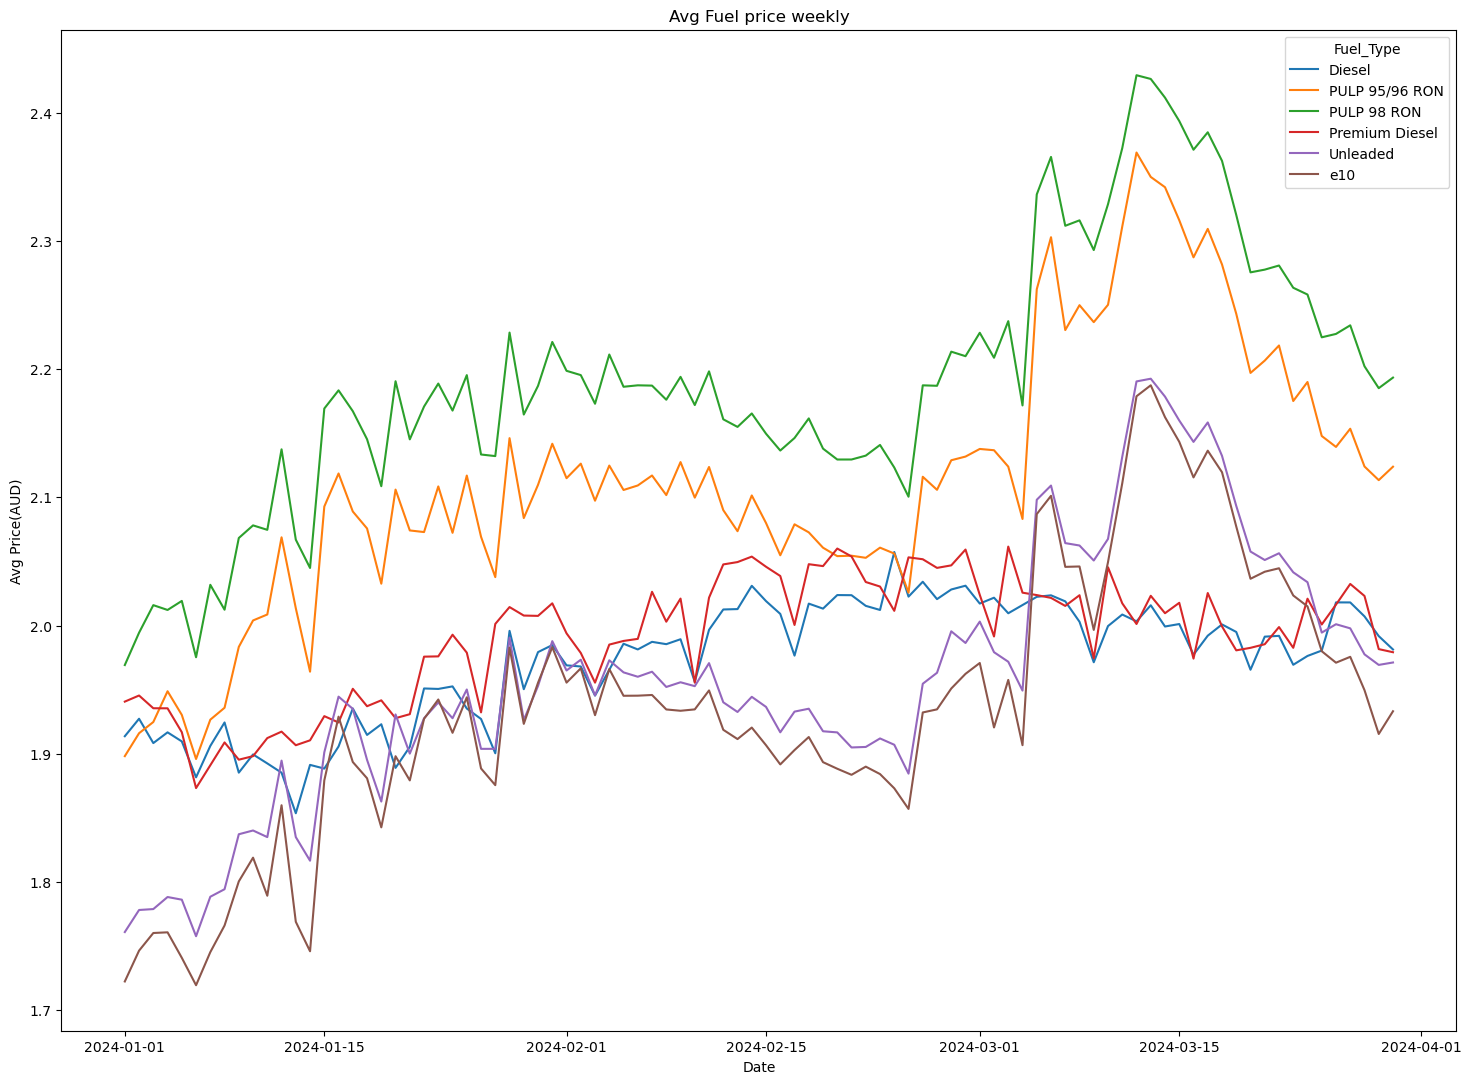

In [19]:
#Plotting the graph
price_graph = prices.unstack().plot.line(figsize = (18,13))
plt.title('Avg Fuel price weekly')
plt.xlabel('Date')
plt.ylabel('Avg Price(AUD)')

Text(0, 0.5, 'Avg Price(AUD)')

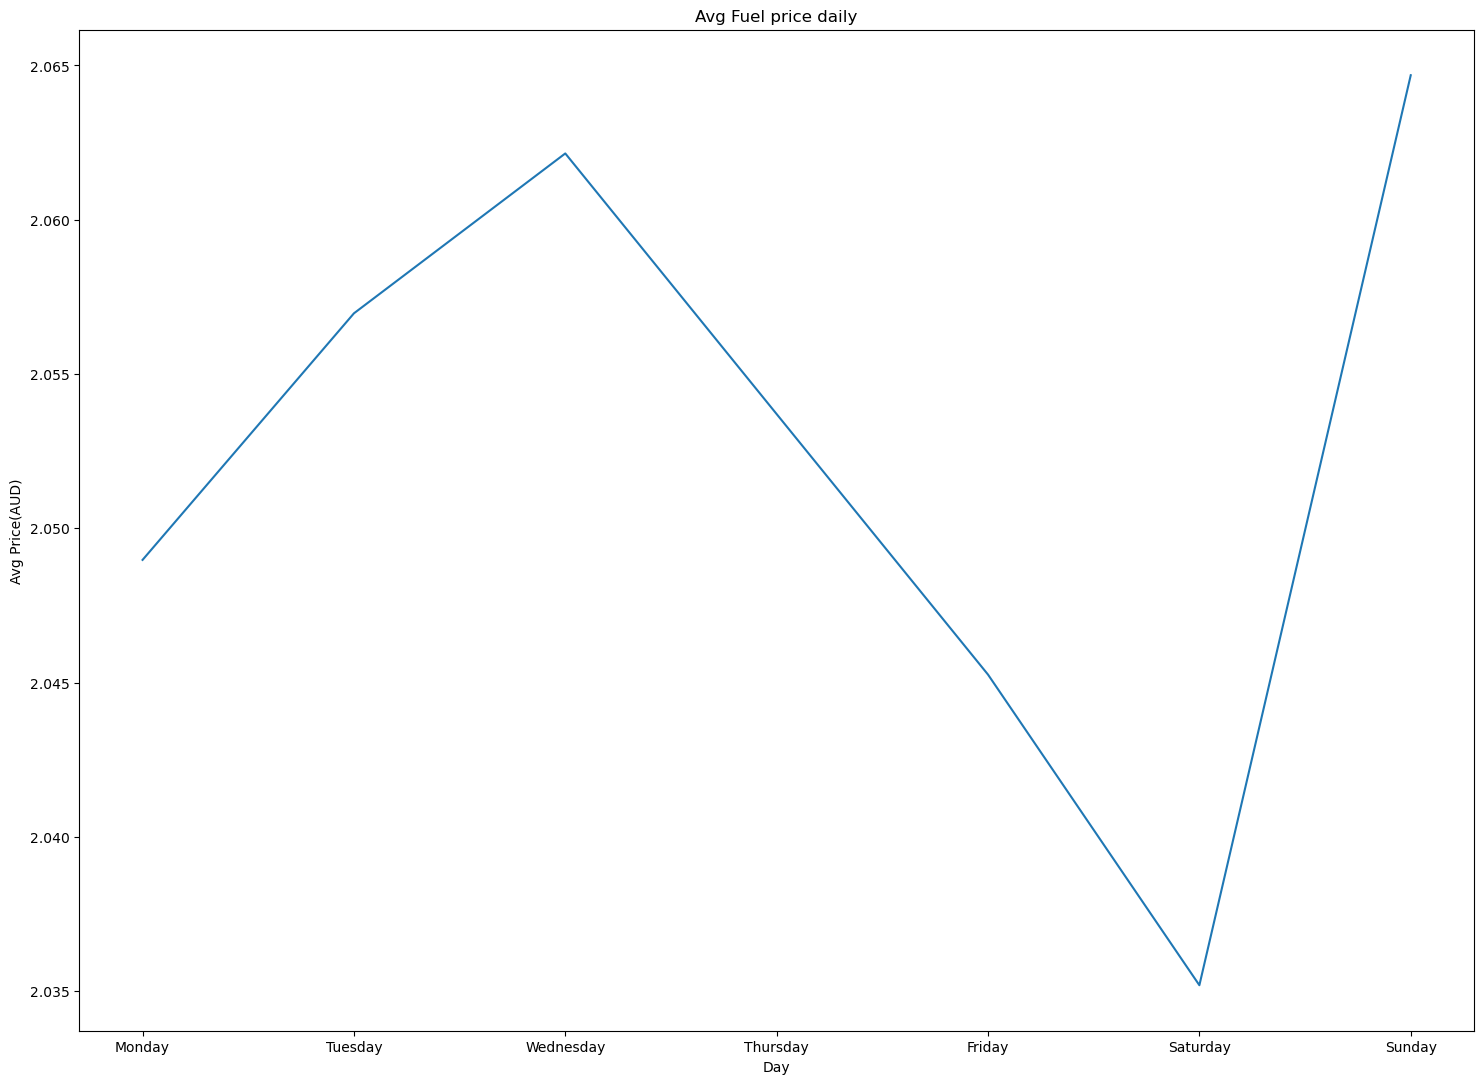

In [20]:
#2nd question:
Updated_Fuel_price['Day_of_the_week'] = pd.to_datetime(Updated_Fuel_price['TransactionDateutc']).dt.day_name()
Graph_2 = Updated_Fuel_price.groupby('Day_of_the_week')['Price'].mean()
#The day is messed up have to rearrange it
Graph_2 = Graph_2[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
Graph_2.plot.line(figsize = (18,13))
plt.title('Avg Fuel price daily')
plt.xlabel('Day')
plt.ylabel('Avg Price(AUD)')
#The Cheapest fuel to buy is on saturday

Text(0, 0.5, 'Latitude')

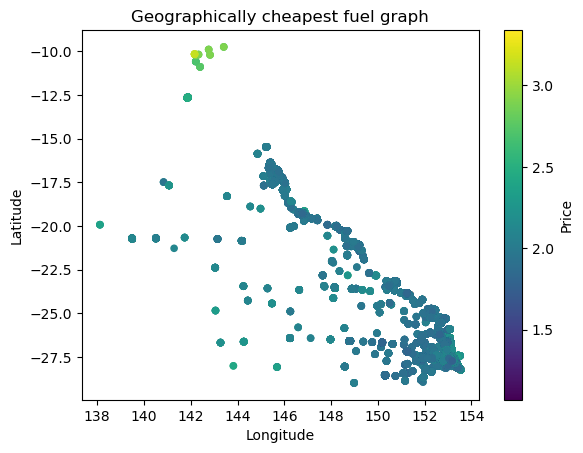

In [21]:
#Part 3:
Updated_Fuel_price.plot.scatter(x = 'Site_Longitude', y ='Site_Latitude', c = 'Price')
plt.title('Geographically cheapest fuel graph')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#The green dots on the graph around the lat of -10 and long of 143 ish shows where fuel is the most expensive

# Part C

In [22]:
#Part 4 : Importing the stock's data
stock_prices = pd.read_csv('Stock_prices.csv', parse_dates = ['Date'])
#Convert to match format for merger ( i got an error code)
Updated_Fuel_price['TransactionDateutc'] = pd.to_datetime(Updated_Fuel_price['TransactionDateutc'])
#Testing the merged datasets and see if the date time matches
merger =  Updated_Fuel_price.join(stock_prices.set_index('Date'), on = 'TransactionDateutc')
merger

,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc,dist_from_home,Day_of_the_week,Close/Last,Volume,Open,High,Low
0,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Diesel,1.899,2024-01-11,6814.082084,Thursday,72.02,347382.0,71.33,73.81,71.17
1,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,PULP 98 RON,2.099,2024-01-11,6814.082084,Thursday,72.02,347382.0,71.33,73.81,71.17
2,61290151,Liberty Surat,Liberty,61 Burrowes Street,Surat,QLD,4417,-27.151687,149.067742,Unleaded,1.899,2024-01-11,6814.082084,Thursday,72.02,347382.0,71.33,73.81,71.17
3,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,1.940,2024-01-18,6744.313723,Thursday,74.08,69420.0,72.78,74.38,72.18
4,61291313,Lowes Mungindi Opt,BP,126 Barwon Street,Mungindi,QLD,4497,-28.973467,148.983829,Diesel,2.010,2024-01-30,6744.313723,Tuesday,77.82,318074.0,77.02,78.14,76.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129168,61478222,Caltex Coopers Plains,Caltex,47 Lensworth St,Coopers Plains,QLD,4108,-27.572060,153.035099,Unleaded,1.835,2024-03-24,7169.894486,Sunday,NaN,NaN,NaN,NaN,NaN
129169,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,Diesel,1.797,2024-03-19,7177.598001,Tuesday,83.47,43027.0,82.85,83.85,82.39
129170,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,e10,1.759,2024-03-19,7177.598001,Tuesday,83.47,43027.0,82.85,83.85,82.39
129171,61478223,Atlas Fuel Holmview,Independent,2 Castile Cres,Holmview,QLD,4207,-27.711250,153.173066,PULP 98 RON,1.993,2024-03-19,7177.598001,Tuesday,83.47,43027.0,82.85,83.85,82.39


Text(0, 0.5, 'Price')

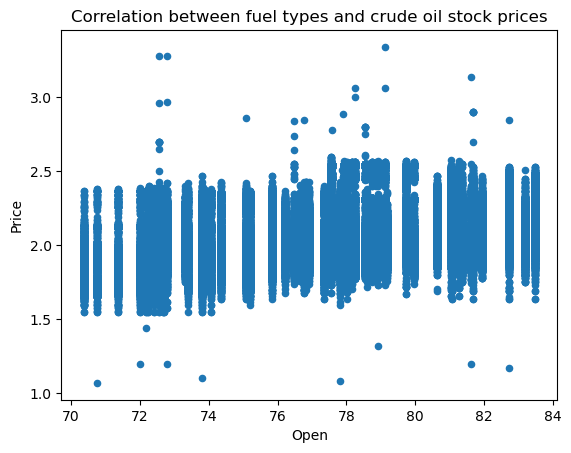

In [23]:
#Plotting the graph
merger.plot.scatter(x = 'Close/Last', y ='Price')
plt.title('Correlation between fuel types and crude oil stock prices')
plt.xlabel('Open')
plt.ylabel('Price')

In [24]:
#Accompany your visual with a correlation coefficient
merger[['Close/Last','Price']].corr()

,Close/Last,Price
Close/Last,1.000000,0.353344
Price,0.353344,1.000000
